In [52]:
%load_ext autoreload
%matplotlib inline

import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import time, datetime
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn import preprocessing

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (18,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
%autoreload
# KS11 (KOSPI 지수)
df_kospi2019 = fdr.DataReader('KS11', '2019-01-01', '2019-12-31')
df_kospi2018 = fdr.DataReader('KS11', '2018-01-01', '2018-12-31')
df_kospi2017 = fdr.DataReader('KS11', '2017-01-01', '2017-12-31')
# df_kospi['Close'].plot()

In [62]:
%autoreload
# KS11 (KOSPI 지수)
# df_kosdaq2019 = fdr.DataReader('KQ11', '2019-01-01', '2019-12-31')
# df_kosdaq2018 = fdr.DataReader('KQ11', '2018-01-01', '2018-12-31')
# df_kosdaq2017 = fdr.DataReader('KQ11', '2017-01-01', '2017-12-31')

def getIndexData(code, year):
    df = fdr.DataReader(code, year+'-01-01', year+'-12-31')
    return df

df_kosdaq2019 = getIndexData('KS11', '2019')
df_DJI2019 = getIndexData('DJI', '2019')

# df_kosdaq['Close'].plot()

대상 년:2017, 2018, 2019
기준 지수: KS11 -> KOSPI 지수

DJI -> 다우존스 지수
IXIC -> 나스닥 지수
US500 -> S&P 500 지수
JP225 -> 닛케이 225 선물
STOXX50 -> 유렵 STOXX 50
HSI -> 항셍 (홍콩)
CSI300 -> CSI 300 (중국)
SSEC -> 상해 종합
UK100 -> 영국 FTSE
DE30 -> 독일 DAX 30
FCHI -> 프랑스 CAC 40

minmax scaler의 경우, 주가와 같은 주기를 띄는 데이터의 경우, 과거에 비해서 현재 데이터의 위치가 어느 정도인지 파악하기에 좋아진다.

data loading -> intersectionIdx -> normalize_minmax -> r2_score 

normalized R2: 0.5654592796518645


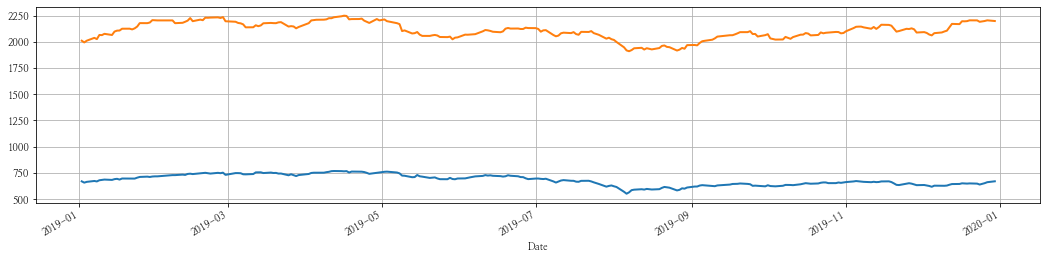

In [60]:
def intersectionIdx(df, df_target):
    df = df.loc[df.index.intersection(df_target.index)]
    
    return df

df_kosdaq = intersectionIdx(df_kosdaq2019, df_kospi2019)
df_kospi = intersectionIdx(df_kospi2019, df_kosdaq2019)
# df_kosdaq = df_kosdaq.loc[df_kosdaq.index.intersection(df_kospi.index)]
df_kosdaq['Close'].plot()
df_kospi['Close'].plot()

# df_kosdaq_minmax_ori = min_max_scaler.fit_transform(np.array(df_kosdaq['Close']).reshape(-1,1))
# df_kospi_minmax_ori = min_max_scaler.fit_transform(np.array(df_kospi['Close']).reshape(-1,1))
# print("original R2:", r2_score(np.array(df_kosdaq['Close']), np.array(df_kospi['Close'])))
# # print(df_kosdaq_minmax)
# print("normalized R2:", r2_score(df_kosdaq_minmax_ori, df_kospi_minmax_ori))

def normalize_minmax(df, column='Close'):
    min_max_scaler = preprocessing.MinMaxScaler()
    df_minmax = min_max_scaler.fit_transform(np.array(df[column]).reshape(-1,1))

    return df_minmax

df_kospi_minmax = normalize_minmax(df_kospi)
df_kosdaq_minmax = normalize_minmax(df_kosdaq)
print("normalized R2:", r2_score(df_kosdaq_minmax, df_kospi_minmax))